# Import Required Libraries
Import the necessary libraries, including NumPy, Matplotlib, and SciPy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the Function
Define the function with a global minimum to be optimized.

In [35]:
# Define the function with a global minimum
def f(x):
    """
    Calculates the value of the function with a global minimum.
    """
    return np.sin(np.pi*x[0]) + np.cos(2*np.pi*x[1])*0.5 + -20*np.exp(-np.linalg.norm(x-np.array([1.5,0.5]))**2/20)# + 0.1 * x[1]**2

# Generate Data for Contour Plot
Generate data for the contour plot using NumPy's linspace and meshgrid functions.

In [36]:
# Generate data for the contour plot using NumPy's linspace and meshgrid functions
x1 = np.linspace(-4, 4, 50)  # Adjust the range as needed
x2 = np.linspace(-4, 4, 50)  # Adjust the range as needed
X1, X2 = np.meshgrid(x1, x2)
Z = np.zeros_like(X1)

for i in range(len(x1)):
    for j in range(len(x2)):
        Z[i, j] = f([X1[i, j], X2[i, j]])

# Optimize Using SciPy's Minimize Function
Use SciPy's minimize function with a valid optimizer method (e.g., 'BFGS') and handle the optimization result.

In [167]:
w = [1, 1]  # Initial guess

In [173]:
def GD_opt(noise_scale, initial_point, alpha):
    w = initial_point  # Initial guess
    w_list = []
    for i in range(100):
        w_list.append(w)
        delta = np.array([
            np.cos(np.pi * w[0]) * np.pi + 2 * (w[0] - 1.5) * np.exp(-np.linalg.norm(w - np.array([1.5, 0.5]))**2 / 20),
            -2 * np.sin(2 * np.pi * w[1])*0.5 * np.pi + 2 * (w[1] - 0.5) * np.exp(-np.linalg.norm(w - np.array([1.5, 0.5]))**2 / 20)
        ])
        delta = delta + np.array([np.random.normal(0, noise_scale), np.random.normal(0, noise_scale)])
        w = w - alpha * delta
    w_list.append(w)
    w_list = np.array(w_list)
    return w_list

In [174]:
def SGD_opt(noise_scale, initial_point, alpha):
    w = initial_point.copy()  # Initial guess
    w_list = []
    for i in range(100):
        rd = np.random.choice([0, 1], p=[0.5, 0.5])
        w_list.append(w.copy())
        delta = np.array([
            np.cos(np.pi * w[0]) * np.pi + 2 * (w[0] - 1.5) * np.exp(-np.linalg.norm(w - np.array([1.5, 0.5]))**2 / 20),
            -2 * np.sin(2 * np.pi * w[1])*0.5 * np.pi + 2 * (w[1] - 0.5) * np.exp(-np.linalg.norm(w - np.array([1.5, 0.5]))**2 / 20)
        ])
        delta = delta + np.array([np.random.normal(0, noise_scale), np.random.normal(0, noise_scale)])
        w[rd] = w[rd] - alpha * delta[rd]
    w_list.append(w.copy())
    w_list = np.array(w_list)
    return w_list

In [175]:
def adam_opt(noise_scale_adam, initial_point, alpha, B1, B2, epsilon): 
    w = initial_point  # Initial guess
    m = np.zeros(2)  # First moment
    v = np.zeros(2)  # Second moment    


    w_list = []
    for i in range(1,100):
        w_list.append(w)
        delta = np.array([
            np.cos(np.pi * w[0]) * np.pi + 2 * (w[0] - 1.5) * np.exp(-np.linalg.norm(w - np.array([1.5, 0.5]))**2 / 20),
            -2 * np.sin(2 * np.pi * w[1])*0.5 * np.pi + 2 * (w[1] - 0.5) * np.exp(-np.linalg.norm(w - np.array([1.5, 0.5]))**2 / 20)
        ])
        delta = delta + np.array([np.random.normal(0, noise_scale_adam), np.random.normal(0, noise_scale_adam)])
        m = B1 * m + (1 - B1) * delta
        v = B2 * v + (1 - B2) * delta**2
        m_hat = m / (1 - B1**i)
        v_hat = v / (1 - B2**i)
        w = w - alpha * m_hat / (np.sqrt(v_hat) + epsilon)
    w_list.append(w)
    w_list = np.array(w_list)
    return w_list


In [176]:
initial_point = [-3, -3]
B1 = 0.9  # Beta1
B2 = 0.999  # Beta2
alpha = 0.1  # Learning rate
epsilon = 1e-8  # Epsilon
m = np.zeros(2)  # First moment
v = np.zeros(2)  # Second moment    
noise_scale = 2  # Noise scale
noise_scale_adam = 2


In [210]:
w_list1 =   GD_opt(0, initial_point, alpha)
w_list2 =  GD_opt(1, initial_point, alpha)
w_list3 = adam_opt(0, initial_point, alpha, B1, B2, epsilon)
w_list4 = adam_opt(1,  initial_point, alpha, B1, B2, epsilon)
w_list5 = adam_opt(3, initial_point, alpha, B1, B2, epsilon)
w_list6 = adam_opt(10, initial_point, alpha, B1, B2, epsilon)

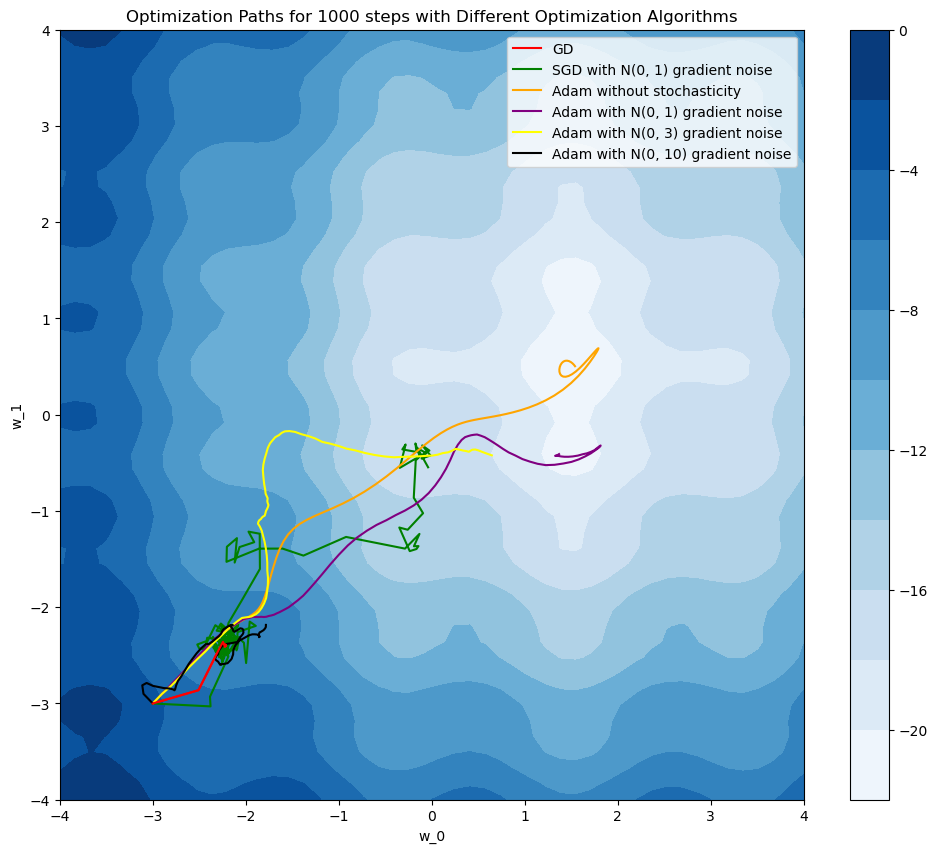

In [211]:


# Create the plot
plt.figure(figsize=(12, 10))

# Contour plot
CS = plt.contourf(X1, X2, Z, levels=10, cmap='Blues')
# Optimization path
plt.plot(w_list1[:, 0], w_list1[:, 1], color='red')
plt.plot(w_list2[:, 0], w_list2[:, 1], color='green')
plt.plot(w_list3[:, 0], w_list3[:, 1], color='orange')
plt.plot(w_list4[:, 0], w_list4[:, 1], color='purple')
plt.plot(w_list5[:, 0], w_list5[:, 1], color='yellow')
plt.plot(w_list6[:, 0], w_list6[:, 1], color='black')
plt.plot(w_list1[:, 0], w_list1[:, 1], color='red')
plt.legend(['GD',
            'SGD with N(0, 1) gradient noise', 
            'Adam without stochasticity', 
            'Adam with N(0, 1) gradient noise', 
            'Adam with N(0, 3) gradient noise', 
            'Adam with N(0, 10) gradient noise'])
plt.colorbar(CS)
plt.xlabel('w_0')
plt.ylabel('w_1')
plt.title('Optimization Paths for 1000 steps with Different Optimization Algorithms')
plt.show()

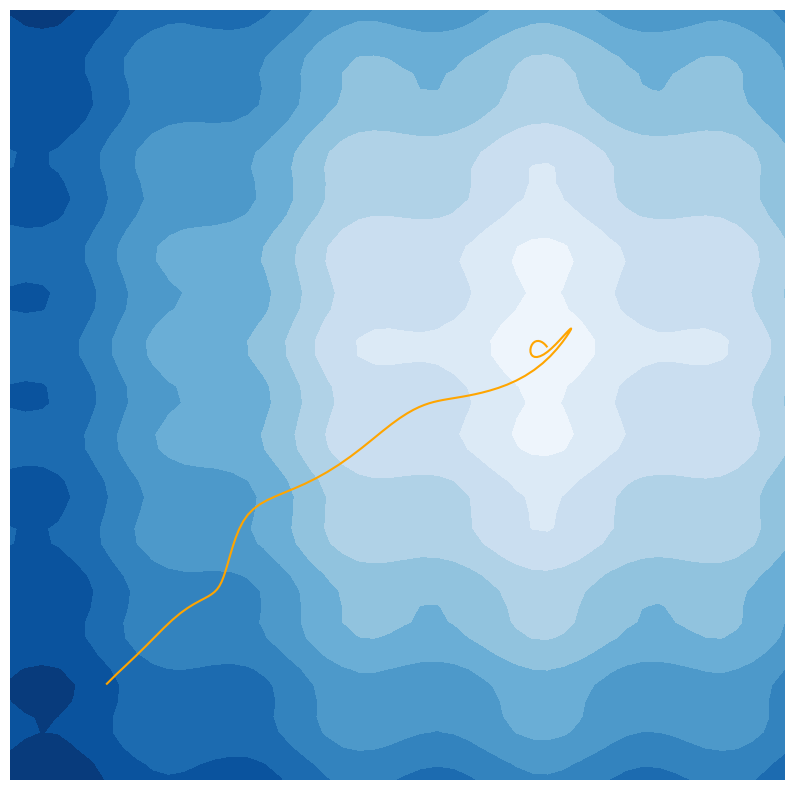

In [212]:
# Create the plot
plt.figure(figsize=(10, 10))

# Contour plot
CS = plt.contourf(X1, X2, Z, levels=10, cmap='Blues')

plt.plot(w_list3[:, 0], w_list3[:, 1], color='orange')
plt.axis('off')
plt.show()

# Extract and Plot Optimization Path
Extract the optimization path from the result and plot it using Matplotlib.

C:\Users\axelo\AppData\Local\Temp\ipykernel_36400\690176149.py:10: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1000)


(0.6178625178955204, 1000)

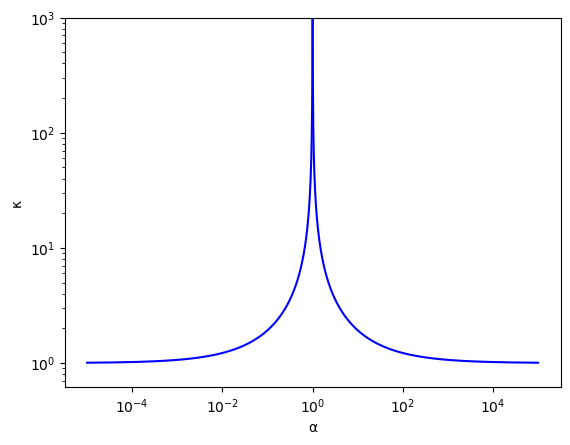

In [28]:
alpha = np.logspace(-5, -0.0001, 1000)
kappas = (1+np.sqrt(alpha))/(1-np.sqrt(alpha))

alpha2 = np.logspace(0.0001, 5, 1000)
kappas2 = (1+np.sqrt(1/alpha2))/(1-np.sqrt(1/alpha2))
plt.loglog(alpha, kappas, color='b')
plt.loglog(alpha2, kappas2, color='b')
plt.xlabel('α')
plt.ylabel('κ')
plt.ylim(0, 1000)



In [29]:
print(alpha)

[1.00000000e-05 1.01159088e-05 1.02331611e-05 1.03517724e-05
 1.04717585e-05 1.05931354e-05 1.07159192e-05 1.08401261e-05
 1.09657727e-05 1.10928756e-05 1.12214518e-05 1.13515183e-05
 1.14830924e-05 1.16161915e-05 1.17508334e-05 1.18870359e-05
 1.20248171e-05 1.21641953e-05 1.23051890e-05 1.24478169e-05
 1.25920981e-05 1.27380516e-05 1.28856968e-05 1.30350533e-05
 1.31861411e-05 1.33389800e-05 1.34935905e-05 1.36499931e-05
 1.38082085e-05 1.39682578e-05 1.41301622e-05 1.42939432e-05
 1.44596226e-05 1.46272223e-05 1.47967647e-05 1.49682722e-05
 1.51417676e-05 1.53172740e-05 1.54948147e-05 1.56744132e-05
 1.58560934e-05 1.60398795e-05 1.62257958e-05 1.64138670e-05
 1.66041182e-05 1.67965745e-05 1.69912616e-05 1.71882052e-05
 1.73874316e-05 1.75889673e-05 1.77928388e-05 1.79990735e-05
 1.82076986e-05 1.84187418e-05 1.86322312e-05 1.88481952e-05
 1.90666623e-05 1.92876617e-05 1.95112226e-05 1.97373749e-05
 1.99661484e-05 2.01975736e-05 2.04316812e-05 2.06685024e-05
 2.09080685e-05 2.115041